In [4]:
# Adapted from https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [32]:
# fix random seed for reproducibility
np.random.seed(7)
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

In [46]:
# Print 1st review 
print(X_train[:1])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

Review count: 25000
Min word count: 11
Max word count: 2494
Average word count: 239
Median word count: 178
Standard deviation for word count: 176


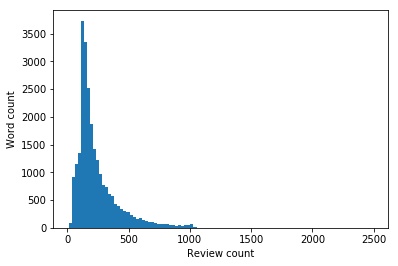

In [34]:
# Find the length of the longest review

def stats(x):
    review_lengths = [len(r) for r in x ]
    print("Review count: %s" % len(review_lengths))
    print("Min word count: %s" % np.min(np.array(review_lengths)))
    print("Max word count: %s" % np.max(np.array(review_lengths)))
    print("Average word count: %.0f" % np.average(np.array(review_lengths)))
    print("Median word count: %.0f" % np.median(np.array(review_lengths)))
    print("Standard deviation for word count: %.0f" % np.std(np.array(review_lengths)))
    
    %matplotlib inline
    plt.hist(review_lengths, density=False, bins=100)
    plt.xlabel('Review count');
    plt.ylabel('Word count');
    
stats(X_train)

In [35]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

Review count: 25000
Min word count: 500
Max word count: 500
Median word count: 500
Standard deviation for word count: 0


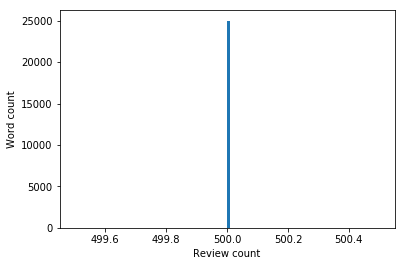

In [21]:
stats(X_train)

In [36]:
# create the model
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 213,301
Trainable params: 213,301
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
24960/25000 [============================>.] - ETA: 0s - loss: 0.4349 - acc: 0.7948

KeyboardInterrupt: 